In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [71]:
mnist = tf.keras.datasets.mnist

In [72]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

In [73]:
x_val, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_val, y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0
x_test = X_test_full/255.0

In [74]:
print(f"X_train : {x_train.shape}")
print(f"Y_train : {y_train.shape}")
print(f"X_Val : {x_val.shape}")
print(f"Y_Val : {y_val.shape}")

X_train : (55000, 28, 28)
Y_train : (55000,)
X_Val : (5000, 28, 28)
Y_Val : (5000,)


In [75]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [76]:
# **Correct the Labels (if needed)**
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Verify Corrected Labels
print("Training label distribution:", np.unique(y_train, return_counts=True))
print("Validation label distribution:", np.unique(y_val, return_counts=True))

Training label distribution: (array([0]), array([55000], dtype=int64))
Validation label distribution: (array([0]), array([5000], dtype=int64))


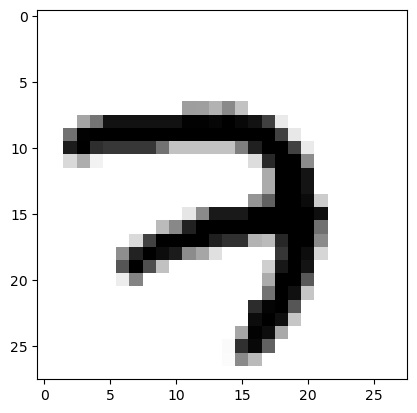

In [77]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Dropout

In [79]:
Layer = [
    # Input(shape=(28,28)),
    Flatten(input_shape=(28,28),name='inputLayer'),
    Dense(units=64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    Dropout(0.1),
    Dense(units=16, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
]

c:\Users\pankr\miniconda3\envs\ev\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model = Sequential(Layer)

In [81]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
Loss_Function = 'sparse_categorical_crossentropy'
Optimizer = 'SGD'
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
Metrics=['accuracy']

model.compile(loss=Loss_Function, optimizer=Optimizer, metrics=Metrics)

In [83]:
Epochs = 5
Validation_set = (x_val, y_val)
history = model.fit(x_train, y_train, epochs=Epochs, validation_data=Validation_set, batch_size=32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9640 - loss: 0.1494 - val_accuracy: 1.0000 - val_loss: 7.6026e-06
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.6843e-06
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 7.5639e-04 - val_accuracy: 1.0000 - val_loss: 7.1107e-07
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 6.5990e-04 - val_accuracy: 1.0000 - val_loss: 3.6066e-07
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.4220e-04 - val_accuracy: 1.0000 - val_loss: 2.2718e-07


In [84]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.993636,0.032651,1.0,7.602566e-06
1,0.999964,0.001117,1.0,1.684267e-06
2,0.999945,0.000694,1.0,7.110663e-07
3,0.999945,0.000557,1.0,3.606642e-07
4,1.000000,0.000296,1.0,2.271846e-07


<Axes: >

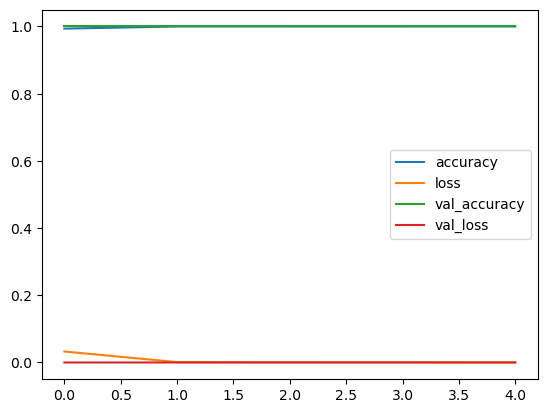

In [85]:
pd.DataFrame(history.history).plot()